# Titanic solution
I will divide my solution into few sections
1) EDA
2) Preprocessing
3) Models training and quality estimation


Let's start with importing reqired libs

In [851]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [852]:
df = pd.read_csv("../input/titanic/train.csv", index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [853]:
df = df.reset_index(drop=True)
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [855]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [856]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### EDA
We already saw that we have some missing values, we will handle them later. Now let's find correlations  with our target value

In [857]:
df.loc[df.duplicated()] # none are duplicated

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


##### Feature understanding

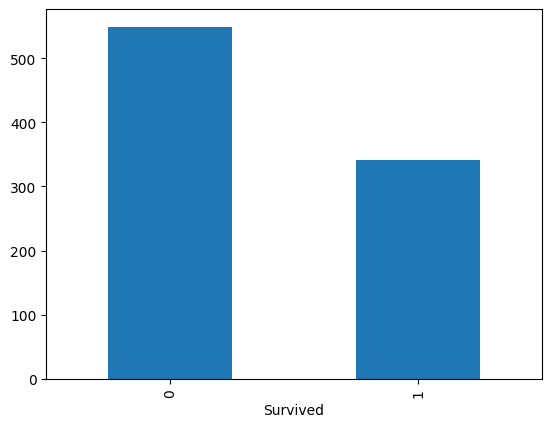

In [858]:
survived_ax = df["Survived"].value_counts().plot(kind="bar")

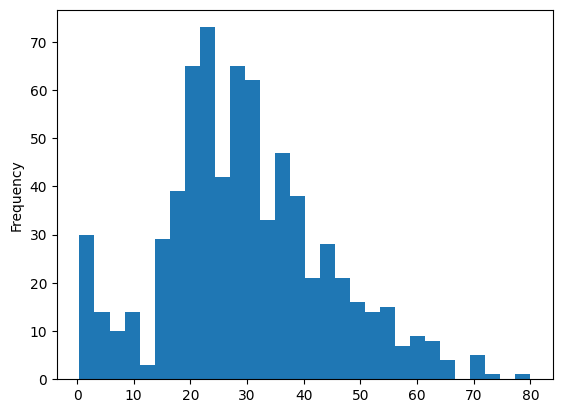

In [859]:
ages_ax = df["Age"].plot(kind="hist", bins=30)
# there are anomalies, median for filling NaN will be better

<Axes: >

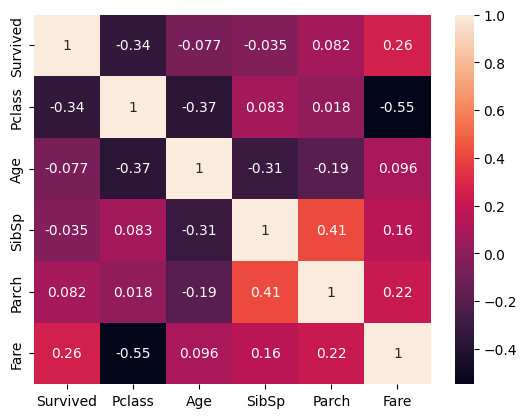

In [860]:
corr_data = df.corr(numeric_only = True)
sns.heatmap(corr_data, annot=True)

We see that
+ Pclass is super correlated with target
+ Fare is also correlated, but it is also thery correlated with Pclass, so acctually we need to choose 1 feature
+ Age could also help us somehow

Let's take a look at the data again

In [861]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [862]:
df.groupby('Sex')['Survived'].mean() # hihly correlated

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [863]:
df.groupby('Embarked')['Survived'].mean() # also can be interesting

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [864]:
df["Cabin"].isnull().sum() # too many lost values, delete

687

In [865]:
df.groupby('SibSp')['Survived'].mean() # not very informative, need new feature

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [866]:
df["FamilySize"] = df['SibSp'] + df['Parch'] + 1
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [867]:
df.groupby("FamilySize")["Survived"].mean() # may be used in our model

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [868]:
df = df.drop(columns=['Name', 'Ticket','Fare','Cabin', 'SibSp', 'Parch'])
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Sex,Age,Embarked,FamilySize
0,0,3,male,22.0,S,2
1,1,1,female,38.0,C,2
2,1,3,female,26.0,S,1
3,1,1,female,35.0,S,2
4,0,3,male,35.0,S,1
...,...,...,...,...,...,...
886,0,2,male,27.0,S,1
887,1,1,female,19.0,S,1
888,0,3,female,NaN,S,4
889,1,1,male,26.0,C,1


### Preprocessing data

In [869]:
from sklearn.model_selection import StratifiedShuffleSplit
X = df.drop(columns="Survived")
y = df["Survived"]

In [870]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    object 
 2   Age         714 non-null    float64
 3   Embarked    889 non-null    object 
 4   FamilySize  891 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [871]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Embarked    889 non-null    object 
 5   FamilySize  891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [872]:
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
df

,Survived,Pclass,Sex,Age,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,S,2,0
1,1,1,female,38.0,C,2,0
2,1,3,female,26.0,S,1,1
3,1,1,female,35.0,S,2,0
4,0,3,male,35.0,S,1,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,S,1,1
887,1,1,female,19.0,S,1,1
888,0,3,female,21.5,S,4,0
889,1,1,male,26.0,C,1,1


In [873]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [874]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Embarked    891 non-null    object 
 5   FamilySize  891 non-null    int64  
 6   IsAlone     891 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [875]:
df.head() # time to encode

,Survived,Pclass,Sex,Age,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,S,2,0
1,1,1,female,38.0,C,2,0
2,1,3,female,26.0,S,1,1
3,1,1,female,35.0,S,2,0
4,0,3,male,35.0,S,1,1


In [876]:
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [877]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  
encoded_features = encoder.fit_transform(df[['Sex', 'Embarked']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))
df_encoded = pd.concat([df.drop(columns=['Sex', 'Embarked']), encoded_df], axis=1)
df = df_encoded
df

,Survived,Pclass,Age,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,2,0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,2,0,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,1,1,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,2,0,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,1,1,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,1,1,0.0,1.0,0.0,0.0,1.0
887,1,1,19.0,1,1,1.0,0.0,0.0,0.0,1.0
888,0,3,21.5,4,0,1.0,0.0,0.0,0.0,1.0
889,1,1,26.0,1,1,0.0,1.0,1.0,0.0,0.0


### Models selections and training
1) divide into train and test
2) train models
3) compare results

In [878]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop(columns=["Survived"])
y = df["Survived"]

# we need (almost) same distributions in our sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
for train_indecies, test_indecies in split.split(X, y):
    X_train, y_train = X.iloc[train_indecies], y.iloc[train_indecies]
    X_test, y_test = X.iloc[test_indecies], y.iloc[test_indecies]
    
print("Train distribution: ")
print(y_train.value_counts(normalize=True))
print("\n")
print("Test distribution: ")
print(y_test.value_counts(normalize=True))

Train distribution: 
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64


Test distribution: 
Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


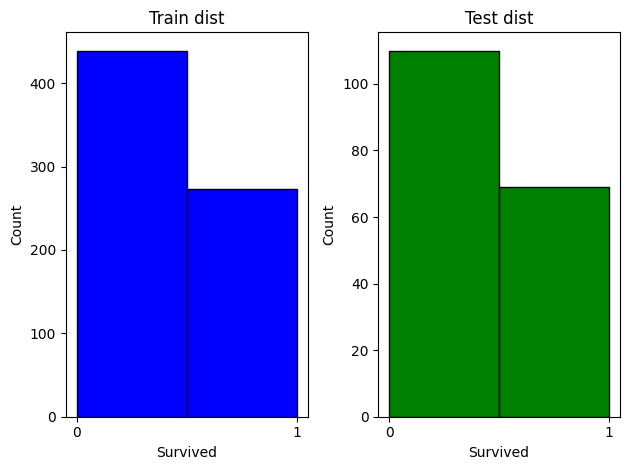

In [879]:
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=2, edgecolor='black', color='blue')
plt.title('Train dist')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1])

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=2, edgecolor='black', color='green')
plt.title('Test dist')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1])

plt.tight_layout()
plt.show()

**Logistic regression**

In [880]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_logreg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Decision Tree**

In [881]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.65      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



**Random Forest**

In [882]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Random Forest Accuracy:  0.8212290502793296
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



**kNN**

In [883]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



**Gradient Boosting**

In [884]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)  
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8435754189944135
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       110
           1       0.86      0.71      0.78        69

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



### Submission

In [885]:
df.head()

,Survived,Pclass,Age,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,2,0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,2,0,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,1,1,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,2,0,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,1,1,0.0,1.0,0.0,0.0,1.0


In [886]:
test_df = pd.read_csv("../input/titanic/test.csv")
test_df.set_index("PassengerId", inplace=True)
test_df["FamilySize"] = test_df['SibSp'] + test_df['Parch'] + 1
test_df["IsAlone"] = (test_df["FamilySize"] == 1).astype(int)
test_df['Age'] = test_df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

test_df = test_df.drop(columns=['Name', 'Ticket','Fare','Cabin', 'SibSp', 'Parch'])

encoded_features = encoder.transform(test_df[['Sex', 'Embarked']])

test_encoded_df = pd.DataFrame(encoded_features, 
                               columns=encoder.get_feature_names_out(['Sex', 'Embarked']),
                               index=test_df.index)  # Сохранение индексов

test_df = pd.concat([test_df.drop(columns=['Sex', 'Embarked']), test_encoded_df], axis=1)

test_df

,Pclass,Age,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
892,3,34.5,1,1,0.0,1.0,0.0,1.0,0.0
893,3,47.0,2,0,1.0,0.0,0.0,0.0,1.0
894,2,62.0,1,1,0.0,1.0,0.0,1.0,0.0
895,3,27.0,1,1,0.0,1.0,0.0,0.0,1.0
896,3,22.0,3,0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1305,3,24.0,1,1,0.0,1.0,0.0,0.0,1.0
1306,1,39.0,1,1,1.0,0.0,1.0,0.0,0.0
1307,3,38.5,1,1,0.0,1.0,0.0,0.0,1.0


In [887]:
test_y_pred = gb.predict(test_df)

In [888]:
test_df.reset_index(inplace=True)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": test_y_pred
    })
submission.to_csv('../working/submission_gb.csv', index=False)